In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_train = pd.read_csv(r"../data/X_train.csv")
X_test = pd.read_csv(r"../data/X_test.csv")
y_train = pd.read_csv(r"../data/y_train.csv")
y_test = pd.read_csv(r"../data/y_test.csv")

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((59954, 92), (59954, 1), (14989, 92), (14989, 1))

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
regression=LinearRegression()

In [7]:
regression.fit(X_train,y_train)

LinearRegression()

In [8]:
## print the coefficients and the intercept
print(regression.coef_)

[[ 5.42111036e+01 -3.38066688e+08  5.86289145e-01  3.61700084e-01
  -2.22324094e+00  4.46454131e+11 -4.94026906e+11  4.65124391e+11
   3.90425729e-01 -1.00557327e-01  2.18433380e-01 -2.48781204e-01
   7.68495202e-02  7.85274506e-01 -6.73059464e-01  3.52759361e-02
   7.12041855e-02 -2.46210365e+01 -1.75169468e-01 -1.51226521e-02
   1.53613329e-01  1.24382734e-01  1.78451538e-02  3.11908722e-02
   6.89493179e-01  3.29471588e-01 -2.96747606e+05 -2.46971320e+04
  -8.08665497e+02 -3.34793701e+01 -5.73143005e-01 -4.23071772e+09
   2.96747690e+05  2.46970596e+04  8.08676331e+02  3.36198120e+01
   5.62484741e-01  1.15905305e+10  2.56632347e+01  2.48503876e+00
   4.26463068e-01  2.03825593e-01 -3.85487080e-03  3.98912907e-01
   4.95613098e-01 -3.22509766e-01 -4.36267853e-02  1.24510378e-01
   6.78683698e-01 -9.69600946e-01  2.60492170e+00 -6.27856612e-01
   2.18521595e-01  1.67979181e-01  1.40102929e+00 -3.55634735e+06
   1.03987592e+09  1.77817359e+07  2.72060562e+08  1.34074291e+09
   1.25539

In [9]:
print(regression.intercept_)

[-3.01062262e+08]


In [10]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [11]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [12]:
reg_pred

array([[19.37186474],
       [11.256396  ],
       [-8.69962585],
       ...,
       [-7.01821613],
       [-6.34559971],
       [77.3799839 ]])

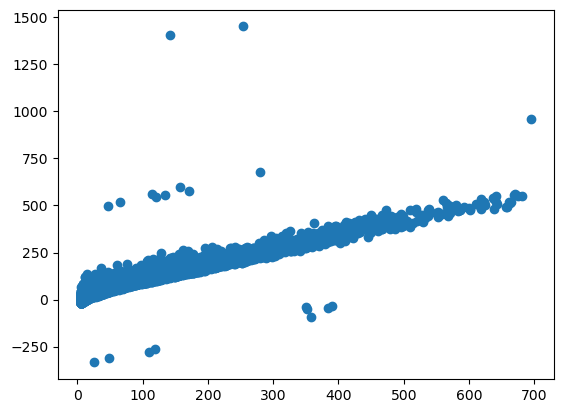

In [13]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [14]:
## Residuals
residuals=y_test-reg_pred

In [15]:
residuals

,charging_duration_min
0,-6.638531
1,2.560271
2,13.699626
3,19.667527
4,5.902081
...,...
14984,-3.445390
14985,-7.893065
14986,12.018216
14987,13.912266


c:\Users\aman2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


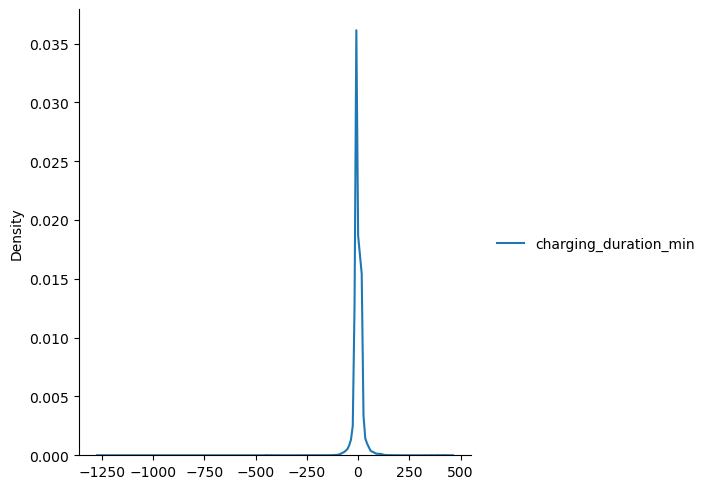

In [16]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

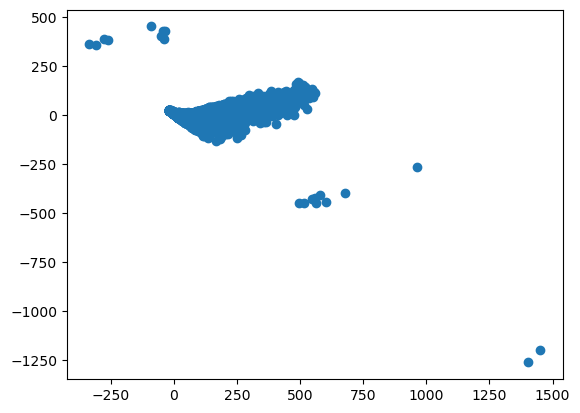

In [17]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

14.174291327160919
775.7665581062886
27.85258620139768


In [19]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.8984002549346969


In [20]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8977727591944976

Mean absolute error 14.174291327160919
R2 Score 0.8984002549346969


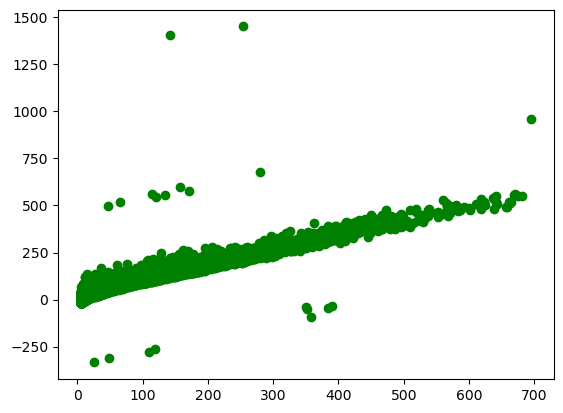

In [21]:
## please check the documentions when ever you have any doubt 
from sklearn.linear_model import LinearRegression ## linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression() ## creating the object of LinearRegression
linreg.fit(X_train,y_train) ## using fit method to train the model
y_pred=linreg.predict(X_test) ## using predict method to predict the values of y based on X_test_scaled
mae=mean_absolute_error(y_test,y_pred) ## MAE
score=r2_score(y_test,y_pred) ## r^2 squared score
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred,color='g') ## scatter plot 

Mean absolute error 31.02006480095999
Mean squared error 2026.3904007799129
R2 Score 0.734609921024968


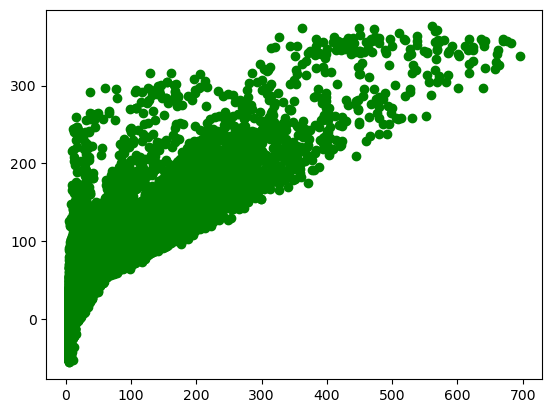

In [23]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.metrics import r2_score
lasso=Lasso() ## creating the object of Lasso
lasso.fit(X_train,y_train) ## using fit method to train the model
y_pred=lasso.predict(X_test) ## using predict method to predict the values of y based on X_test_scaled
mae=mean_absolute_error(y_test,y_pred) ## MAE
mse=mean_squared_error(y_test,y_pred) ## MAE
score=r2_score(y_test,y_pred) ## r^2 squared score
print("Mean absolute error", mae) ## printing MAE
print("Mean squared error", mse) ## printing MSE
print("R2 Score", score) ## printing r^2 score
plt.scatter(y_test,y_pred,color='g') ## scatter plot
## for feature selection we can use lasso regression

Mean absolute error 30.84230669694522
R2 Score 0.7444346607062788


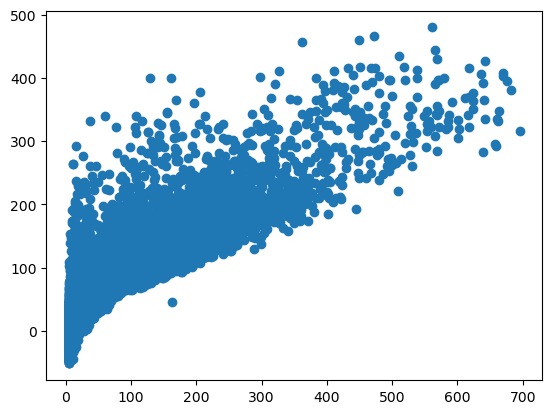

In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
## to reduce overfitting Rigde regression is used

Mean absolute error 32.359149760045376
R2 Score 0.6519086607694742


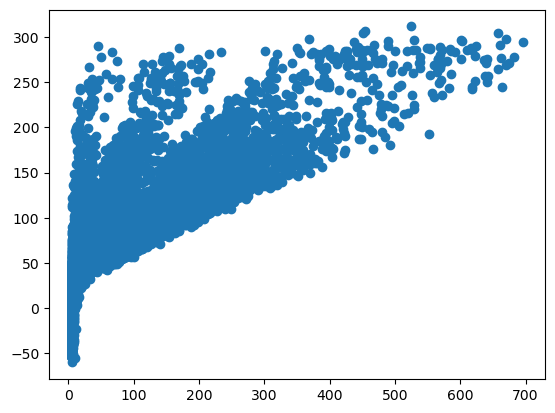

In [25]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train,y_train)
y_pred=elastic.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [28]:
elastic

ElasticNet()

In [29]:
ridge

Ridge()

In [30]:
lasso

Lasso()

In [31]:
linreg

LinearRegression()

In [32]:
import pickle
pickle.dump(elastic,open(r"../Saving The Model Results/elastic_net_regression.pkl",'wb'))  # save the scaler model
pickle.dump(ridge,open(r"../Saving The Model Results/ridge_regression.pkl",'wb'))  # save the ridge model
pickle.dump(lasso,open(r"../Saving The Model Results/lasso_regression.pkl",'wb'))  # save the ridge model
pickle.dump(linreg,open(r"../Saving The Model Results/linear_regression.pkl",'wb'))  # save the ridge model
